In [ ]:
# Google Drive 연동
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# 필요한 라이브러리 설치
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import numpy as np


# 엑셀 파일 불러오기
file_path = "/content/drive/MyDrive/FoodArchiveanswer.xlsx"  # 경로 수정 필요
df = pd.read_excel(file_path)

ViT 모델 성능
Confusion Matrix:
 [[ 34 323]
 [  0   0]]
Accuracy : 0.0952
Precision: 1.0000
Recall   : 0.0952
F1-Score : 0.1739
ViT + Food101 모델 성능 (파인튜닝)
Confusion Matrix:
 [[138 219]
 [  0   0]]
Accuracy : 0.3866
Precision: 1.0000
Recall   : 0.3866
F1-Score : 0.5576


<ipython-input-25-3479625316>:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=["ViT", "ViT + Food101"], y=[acc_vit, acc_finetuned], palette="pastel")


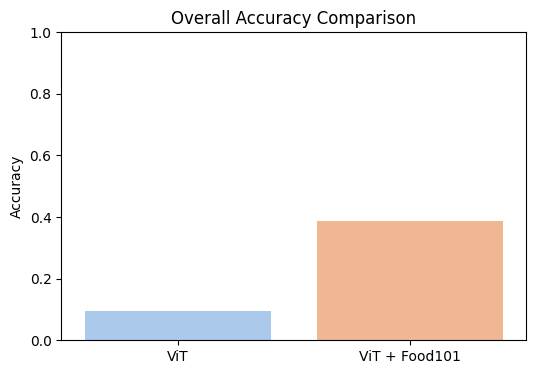

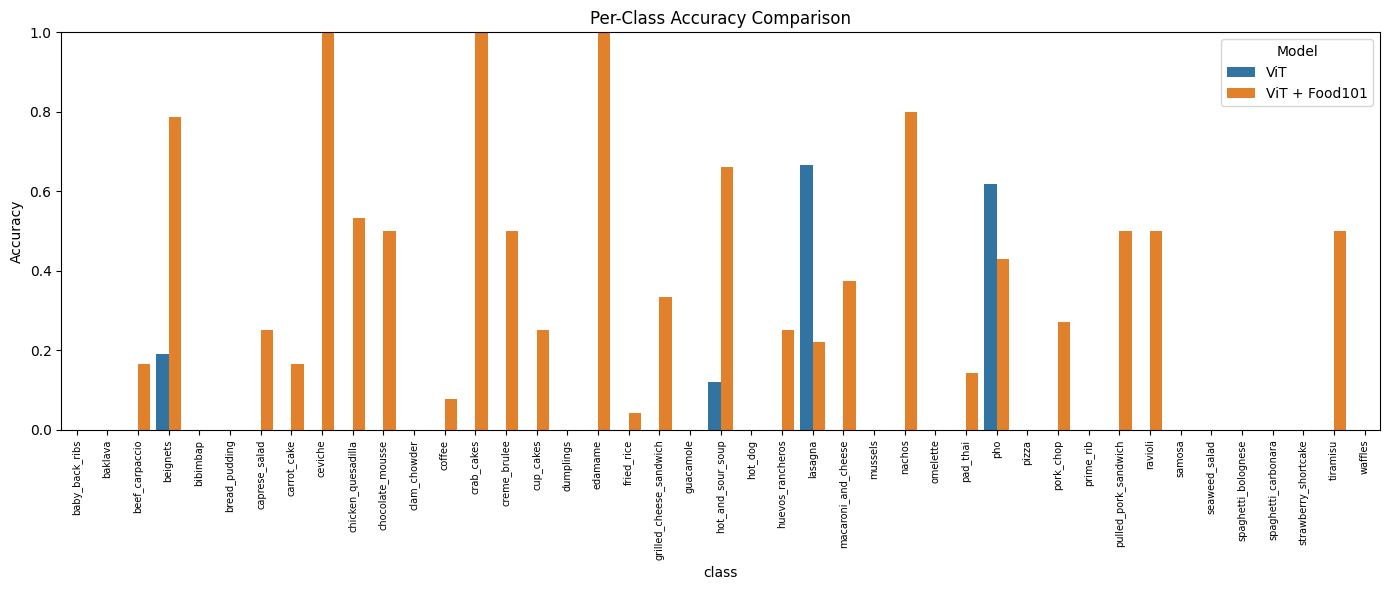

ViT 기준 정답률 0% 클래스 예측 분포


,True Label,Predicted Label,Count
0,baby_back_ribs,rotisserie,1
1,baby_back_ribs,"American lobster, Northern lobster, Maine lobs...",1
2,baby_back_ribs,plate,1
3,baklava,"bakery, bakeshop, bakehouse",1
4,beef_carpaccio,plate,3
...,...,...,...
135,strawberry_shortcake,trifle,1
136,strawberry_shortcake,"chocolate sauce, chocolate syrup",1
137,tiramisu,eggnog,2
138,waffles,conch,1


ViT+Food101 기준 정답률 0% 클래스 예측 분포


,True Label,Predicted Label,Count
0,baby_back_ribs,beignets,1
1,baby_back_ribs,hot_and_sour_soup,1
2,baby_back_ribs,pulled_pork_sandwich,1
3,baklava,pad_thai,1
4,bibimbap,beignets,5
5,bibimbap,clam_chowder,1
6,bibimbap,pulled_pork_sandwich,1
7,bread_pudding,bibimbap,1
8,bread_pudding,fried_rice,1
9,bread_pudding,beignets,1


In [ ]:
labels = sorted(df["correctanswer"].unique())

# 정답 여부
df["vitcorrect"] = (df["predvit"] == df["correctanswer"]).astype(int)
df["finetunedcorrect"] = (df["predfinetuned"] == df["correctanswer"]).astype(int)

# confusion matrix 계산
cm_vit = confusion_matrix([1]*len(df), df["vitcorrect"], labels=[1, 0])
cm_finetuned = confusion_matrix([1]*len(df), df["finetunedcorrect"], labels=[1, 0])

# 정확도, 정밀도, 재현율, F1
acc_vit = accuracy_score([1]*len(df), df["vitcorrect"])
pre_vit = precision_score([1]*len(df), df["vitcorrect"])
rec_vit = recall_score([1]*len(df), df["vitcorrect"])
f1_vit  = f1_score([1]*len(df), df["vitcorrect"])

acc_ft = accuracy_score([1]*len(df), df["finetunedcorrect"])
pre_ft = precision_score([1]*len(df), df["finetunedcorrect"])
rec_ft = recall_score([1]*len(df), df["finetunedcorrect"])
f1_ft  = f1_score([1]*len(df), df["finetunedcorrect"])

# 결과 출력
print("ViT 모델 성능")
print("Confusion Matrix:\n", cm_vit)
print(f"Accuracy : {acc_vit:.4f}")
print(f"Precision: {pre_vit:.4f}")
print(f"Recall   : {rec_vit:.4f}")
print(f"F1-Score : {f1_vit:.4f}")

print("ViT + Food101 모델 성능 (파인튜닝)")
print("Confusion Matrix:\n", cm_finetuned)
print(f"Accuracy : {acc_ft:.4f}")
print(f"Precision: {pre_ft:.4f}")
print(f"Recall   : {rec_ft:.4f}")
print(f"F1-Score : {f1_ft:.4f}")

# 전체 Accuracy 비교
acc_vit = accuracy_score(df["correctanswer"], df["predvit"])
acc_finetuned = accuracy_score(df["correctanswer"], df["predfinetuned"])

plt.figure(figsize=(6, 4))
sns.barplot(x=["ViT", "ViT + Food101"], y=[acc_vit, acc_finetuned], palette="pastel")
plt.title("Overall Accuracy Comparison")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.show()

# 클래스별 정확도 비교
class_acc = pd.DataFrame()
for label in labels:
    acc_v = accuracy_score(
        df[df["correctanswer"] == label]["correctanswer"],
        df[df["correctanswer"] == label]["predvit"]
    )
    acc_f = accuracy_score(
        df[df["correctanswer"] == label]["correctanswer"],
        df[df["correctanswer"] == label]["predfinetuned"]
    )
    class_acc = pd.concat([class_acc, pd.DataFrame({
        "class": [label],
        "ViT": [acc_v],
        "ViT + Food101": [acc_f]
    })], ignore_index=True)

# 시각화
plt.figure(figsize=(14, 6))
sns.barplot(data=class_acc_melt, x="class", y="Accuracy", hue="Model")
plt.title("Per-Class Accuracy Comparison")
plt.xticks(rotation=90, fontsize=7)
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

# 클래스 목록
labels = sorted(df["correctanswer"].unique())

# ViT 모델 기준 정답률 0% 클래스 예측 분포
rows_vit = []
for label in labels:
    class_df = df[df["correctanswer"] == label]
    acc = accuracy_score(class_df["correctanswer"], class_df["predvit"])
    if acc == 0:
        preds = class_df["predvit"].value_counts().reset_index()
        preds.columns = ["Predicted Label", "Count"]
        preds["True Label"] = label
        rows_vit.append(preds)

zero_acc_preds_vit = pd.concat(rows_vit, ignore_index=True)[["True Label", "Predicted Label", "Count"]]

# Fine-tuned 모델 기준 정답률 0% 클래스 예측 분포
rows_ft = []
for label in labels:
    class_df = df[df["correctanswer"] == label]
    acc = accuracy_score(class_df["correctanswer"], class_df["predfinetuned"])
    if acc == 0:
        preds = class_df["predfinetuned"].value_counts().reset_index()
        preds.columns = ["Predicted Label", "Count"]
        preds["True Label"] = label
        rows_ft.append(preds)

zero_acc_preds_ft = pd.concat(rows_ft, ignore_index=True)[["True Label", "Predicted Label", "Count"]]

# 결과 출력
print("ViT 기준 정답률 0% 클래스 예측 분포")
display(zero_acc_preds_vit)

print("ViT+Food101 기준 정답률 0% 클래스 예측 분포")
display(zero_acc_preds_ft)
